In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("used_device_data.csv")

In [4]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [5]:
print(f"Total Rows in dataset : {df.shape[0]}\nTotal Columsn in dataset : {df.shape[1]}")

Total Rows in dataset : 3454
Total Columsn in dataset : 15


In [6]:
# All columns
df.columns

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

##  Check Null values


In [8]:
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

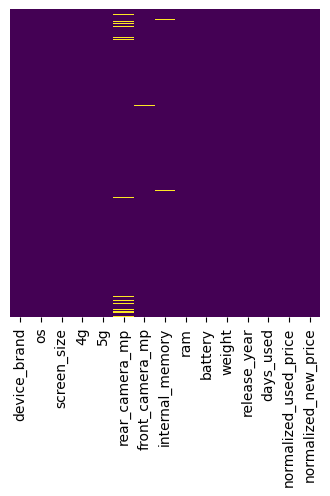

In [16]:
plt.figure(figsize = (4,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap="viridis")
plt.xticks(rotation = 90)
plt.show()

In [20]:
# total percetage of missing values
per_miss_value = df.isnull().sum().sum()/(df.shape[0]*df.shape[1]) *100
per_miss_value

0.3898861223701988

In [26]:
# misssing value are too less so we drop this 
df = df.dropna()

[]

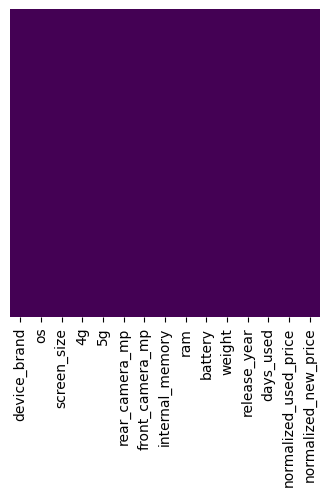

In [30]:
#After drap all values
plt.figure(figsize=(4,4))
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis", cbar=False)
plt.plot()

# Check Duplicate values

In [31]:
df.duplicated().sum()

0

### check 4G and 5G 

In [32]:
df["4g"].value_counts()

yes    2148
no     1105
Name: 4g, dtype: int64

In [33]:
df["5g"].value_counts()

no     3168
yes      85
Name: 5g, dtype: int64

In [34]:
# lets change yes = 1 and no = 0
df["4g"] = df["4g"].map({"yes":1,"no":0})
df["5g"] = df["5g"].map({"yes":1,"no":0})

In [35]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [37]:
df["device_brand"].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Lava', 'Lenovo', 'LG',
       'Micromax', 'Nokia', 'Oppo', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE',
       'Apple', 'Asus', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon',
       'Coolpad', 'Gionee', 'Google', 'Karbonn', 'Meizu', 'Microsoft',
       'Motorola', 'OnePlus', 'Panasonic', 'Realme', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [39]:
df["device_brand"].value_counts()

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           136
Alcatel       121
Asus          118
Micromax      117
Honor         116
HTC           110
Xiaomi        109
Oppo          109
Vivo          103
Nokia          97
Motorola       88
Sony           79
Gionee         56
Acer           51
Panasonic      45
Meizu          44
XOLO           42
Apple          39
Lava           34
Celkon         33
Spice          30
Karbonn        29
Microsoft      21
Coolpad        19
BlackBerry     18
Google         13
OnePlus         5
Realme          5
Name: device_brand, dtype: int64

[]

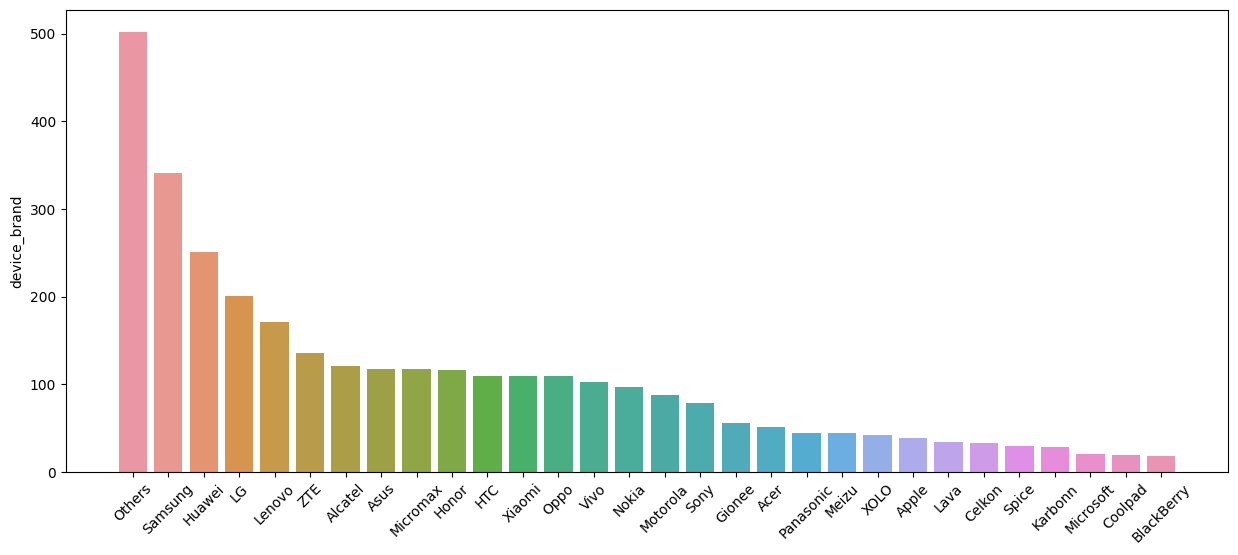

In [45]:
brand = df["device_brand"].value_counts().sort_values(ascending=False)[:30]

fig = plt.figure(figsize=(15,6))
sns.barplot(x=brand.index, y = brand)
plt.xticks(rotation = 45)
plt.plot()

In [47]:
df["os"].unique()

array(['Android', 'Others', 'iOS', 'Windows'], dtype=object)

In [55]:
df["os"].value_counts()

Android    3024
Others      128
Windows      65
iOS          36
Name: os, dtype: int64

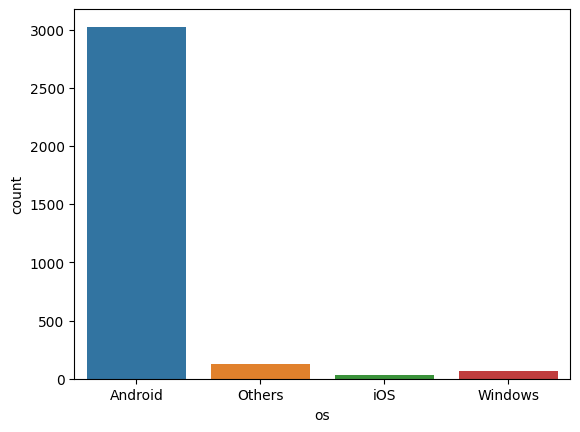

In [60]:
sns.countplot(x=df["os"])
plt.show()

In [63]:
df["release_year"].value_counts()

2014    639
2013    567
2015    507
2019    399
2016    381
2018    310
2017    297
2020    153
Name: release_year, dtype: int64

In [64]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [67]:
# Analysis on Ram
df["ram"].value_counts()

4.00     2755
6.00      109
8.00       88
0.25       83
2.00       70
3.00       64
1.00       34
0.03       16
0.02       14
12.00      10
0.50        9
1.50        1
Name: ram, dtype: int64

<AxesSubplot: ylabel='count'>

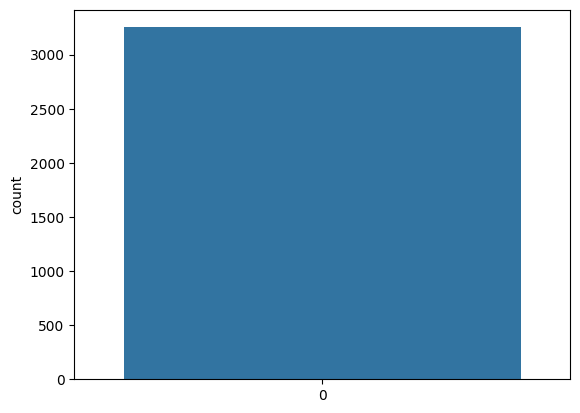

In [75]:
sns.countplot(df["ram"])

In [81]:
four_G = "Yes"
four_G = [1 if four_G == "Yes" else 0]
print(type(four_G[0]))

<class 'int'>
